In [593]:
import numpy as np
import pandas as pd
from collections import Counter
from numpy import random
import os
import scipy
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm, t
import seaborn as sns
import pylab
from pylab import legend, plot, show, title, xlabel, ylabel
from random import choice
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats import proportion as ssp

from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [594]:
df_first = pd.read_csv("C:/Users/NKIT/Downloads/exam_csv/previous_application.csv")
df_second = pd.read_csv("C:/Users/NKIT/Downloads/exam_csv/application_data.csv")
df_first.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


WE ARE LOADING DATASET INTO THE DATAFRAME. BOTH PREVIOUS AND CURRENT APPLICATION

In [595]:
df_second.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


We are merging the two csv file with inner join so get the idea of SK_ID_CURR and SK_ID_PREV

In [596]:
inner_df = pd.concat([df_first,df_second],axis=1,join="inner")

# WE ARE MERGING THE DATASET WITH INNER JOIN BECAUSE OUR PROBLEM STATEMENT STATE THAT WHO TAKE LOAN FROM BANK BOTH PREVIOUS AND CURRENT CAN REPAY THE LOAN OR NOT.

In [597]:
inner_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,2510843,258664,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,1386044,446476,Cash loans,18212.805,157500.0,167895.0,NaN,157500.0,WEDNESDAY,18,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,2116355,440338,Cash loans,26316.945,450000.0,491580.0,NaN,450000.0,WEDNESDAY,12,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,2430880,134252,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,18,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Now we are dropping the column which are not neccessary right now.

BECAUSE I BELIEVE THE I DON'T NEED SK_ID_PRE AND CURR AND FLAG DOCUMENT, DAY OF LOAN PROCESS THAT'S WHY I REMOVE THE COLUMN WHICH I BELIEVE IS UNNECESSARY FOR EDA ANALYSIS.

In [598]:
inner_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=159)

NOW DROPPING THE COLUMN WHICH IS AMBIGUITY AND DOESN'T NEED IN THE NEW DATAFRAME SO DROP THAT DATAFRAME. HERE WE ALSO CHECK ANY DUPLICATE VALUE OR NOT 
THERE ARE NO DUPLICATE VALUE SO WE ARE NOT DROPPING ANY ROW IF THERE ARE DUPLICATE VALUE WE SHOULD DROP THAT VALUE /ROW FROM DATASET

In [599]:
print(inner_df.columns.duplicated())  # Shows True for duplicate columns
inner_df = inner_df.loc[:, ~inner_df.columns.duplicated()]


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False  True False False False False False  True  True  True
  True False False False False False False False False False False False
 False False False False False False False False False  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False]


In [600]:
new_df = pd.DataFrame(inner_df,columns=["NAME_CONTRACT_TYPE",'AMT_ANNUITY','TARGET','AMT_CREDIT','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE', 'NAME_CASH_LOAN_PURPOSE','NAME_INCOME_TYPE','NAME_HOUSING_TYPE','CODE_REJECT_REASON'])

In [601]:
new_df

,NAME_CONTRACT_TYPE,AMT_ANNUITY,TARGET,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,CODE_REJECT_REASON
0,Consumer loans,1730.430,1,17145.0,0.0,17145.0,XAP,Working,House / apartment,XAP
1,Cash loans,25188.615,0,679671.0,NaN,607500.0,XNA,State servant,House / apartment,XAP
2,Cash loans,15060.735,0,136444.5,NaN,112500.0,XNA,Working,House / apartment,XAP
3,Cash loans,47041.335,0,470790.0,NaN,450000.0,XNA,Working,House / apartment,XAP
4,Cash loans,31924.395,0,404055.0,NaN,337500.0,Repairs,Working,House / apartment,HC
...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,NaN,0,0.0,NaN,NaN,XNA,Working,With parents,XAP
307507,Cash loans,18212.805,0,167895.0,NaN,157500.0,XNA,Pensioner,House / apartment,XAP
307508,Cash loans,26316.945,0,491580.0,NaN,450000.0,XNA,Working,House / apartment,XAP
307509,Cash loans,NaN,1,0.0,NaN,NaN,XNA,Commercial associate,House / apartment,XAP


Columns to Drop:
Some columns might not be necessary for analysis, or they could be dropped due to being redundant, having too many missing values, or not being relevant for the specific type of analysis you’re conducting. Here's a list of columns you might consider dropping based on typical analysis goals:

Hashed or Unique Identifiers:

SK_ID_PREV, SK_ID_CURR: These columns are unique identifiers and will not help in predicting outcomes, so they can be dropped for modeling purposes.
Non-informative Columns:

NFLAG_LAST_APPL_IN_DAY: This might be redundant or highly correlated with other features like WEEKDAY_APPR_PROCESS_START.
FLAG_LAST_APPL_PER_CONTRACT: This could be related to the same concept of multiple applications, so you might drop it for simplicity.
NFLAG_MICRO_CASH: If micro-loans are not a key focus of your analysis, this might not be relevant.
Columns with Excessive Missing Data:

If any of the columns, like SELLERPLACE_AREA, NAME_SELLER_INDUSTRY, have too many missing values and are not crucial to the analysis, you can drop them.
Columns with Too Many Categories or that Are Highly Specific:

PRODUCT_COMBINATION, NAME_YIELD_GROUP, NAME_PAYMENT_TYPE: If you are not specifically analyzing the exact type of product or yield grouping, these could be dropped for simplicity, unless they add significant value to your analysis.
Final Considerations:
Missing Values: You'll need to carefully check for missing values and decide whether to fill them (e.g., with the mean, median, or mode) or drop rows/columns.
Outliers: Certain features like AMT_APPLICATION, AMT_CREDIT, and AMT_GOODS_PRICE might have extreme values. You might want to investigate and handle these outliers before applying machine learning models.

In [602]:
# new_df.rename(columns={"NAME_CONTRACT_TYPE\t":"NAME_CONTRACT_TYPE"},inplace=True)

In [603]:
new_df["CODE_REJECT_REASON"].unique()

array(['XAP', 'HC', 'LIMIT', 'CLIENT', 'SCOFR', 'SCO', 'XNA', 'VERIF',
       'SYSTEM'], dtype=object)

In [604]:
new_df["NAME_CASH_LOAN_PURPOSE"].unique()

array(['XAP', 'XNA', 'Repairs', 'Everyday expenses', 'Car repairs',
       'Building a house or an annex', 'Other', 'Journey',
       'Purchase of electronic equipment', 'Medicine',
       'Payments on other loans', 'Urgent needs', 'Buying a used car',
       'Buying a new car', 'Buying a holiday home / land', 'Education',
       'Buying a home', 'Furniture', 'Buying a garage',
       'Business development', 'Wedding / gift / holiday', 'Hobby',
       'Gasification / water supply', 'Refusal to name the goal',
       'Money for a third person'], dtype=object)

In [605]:
np.where(new_df["NAME_CASH_LOAN_PURPOSE"].isnull()),np.where(new_df["CODE_REJECT_REASON"].isnull())

((array([], dtype=int64),), (array([], dtype=int64),))

In [606]:
new_df.head()

,NAME_CONTRACT_TYPE,AMT_ANNUITY,TARGET,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,CODE_REJECT_REASON
0,Consumer loans,1730.430,1,17145.0,0.0,17145.0,XAP,Working,House / apartment,XAP
1,Cash loans,25188.615,0,679671.0,NaN,607500.0,XNA,State servant,House / apartment,XAP
2,Cash loans,15060.735,0,136444.5,NaN,112500.0,XNA,Working,House / apartment,XAP
3,Cash loans,47041.335,0,470790.0,NaN,450000.0,XNA,Working,House / apartment,XAP
4,Cash loans,31924.395,0,404055.0,NaN,337500.0,Repairs,Working,House / apartment,HC


In [607]:
amt_pay = np.where(new_df["AMT_DOWN_PAYMENT"].isnull())
len(amt_pay[0])

159975

In [608]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NAME_CONTRACT_TYPE      307511 non-null  object 
 1   AMT_ANNUITY             240664 non-null  float64
 2   TARGET                  307511 non-null  int64  
 3   AMT_CREDIT              307511 non-null  float64
 4   AMT_DOWN_PAYMENT        147536 non-null  float64
 5   AMT_GOODS_PRICE         238543 non-null  float64
 6   NAME_CASH_LOAN_PURPOSE  307511 non-null  object 
 7   NAME_INCOME_TYPE        307511 non-null  object 
 8   NAME_HOUSING_TYPE       307511 non-null  object 
 9   CODE_REJECT_REASON      307511 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 23.5+ MB


In [609]:
new_df.shape

(307511, 10)

Here from new dataframe we are replacing null value with median value , There are the column which are not null we doesn't do anything on that.

In [610]:
new_df["AMT_ANNUITY"].mean(),new_df["AMT_ANNUITY"].median()

(np.float64(15652.864966197689), np.float64(11061.0))

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='AMT_CREDIT'>

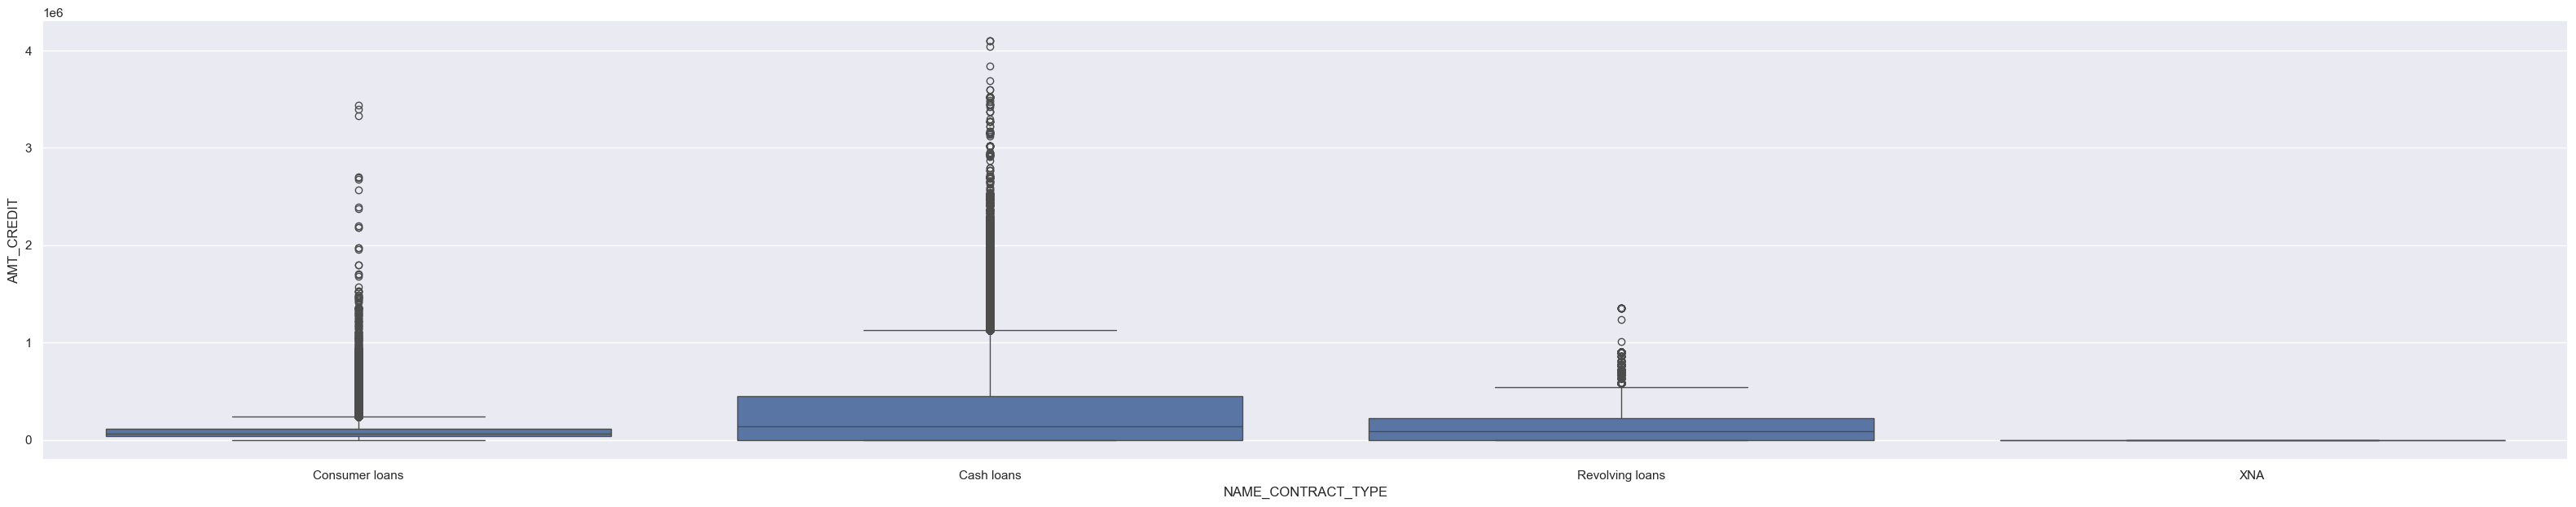

In [611]:
sns.boxplot(data=new_df, x=new_df["NAME_CONTRACT_TYPE"],y=new_df["AMT_CREDIT"])

If AMT_CREDIT is high for some contract types: This could indicate that certain types of contracts involve larger loans or financing options.
If the spread is wider for certain contract types: This could suggest that within these contract types, there is a broader range of credit amounts, possibly indicating a more diverse set of customers or loan sizes.
Outliers: Outliers in specific contract types may point to exceptional cases, such as unusually large loans for a given contract type.

# Cash Type loans have highest type of outliers means they have extreme value in the dataset.

# FEATURE SCALLING HERE 

In [612]:
# scaler = MinMaxScaler() # initalizing the MinMaxScaler 
# normalized_df = scaler.fit_transform(new_df) # Here the transforming the DataFrame into Normal Distribution Curve
# print(normalized_df)

In [613]:
new_df["AMT_ANNUITY"] = new_df["AMT_ANNUITY"].fillna(11061.0)
new_df.head()

,NAME_CONTRACT_TYPE,AMT_ANNUITY,TARGET,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,CODE_REJECT_REASON
0,Consumer loans,1730.430,1,17145.0,0.0,17145.0,XAP,Working,House / apartment,XAP
1,Cash loans,25188.615,0,679671.0,NaN,607500.0,XNA,State servant,House / apartment,XAP
2,Cash loans,15060.735,0,136444.5,NaN,112500.0,XNA,Working,House / apartment,XAP
3,Cash loans,47041.335,0,470790.0,NaN,450000.0,XNA,Working,House / apartment,XAP
4,Cash loans,31924.395,0,404055.0,NaN,337500.0,Repairs,Working,House / apartment,HC


In [614]:
# new_df["AMT_DOWN_PAYMENT"] = new_df["AMT_DOWN_PAYMENT"].ffill()

In [615]:
new_df["AMT_DOWN_PAYMENT"].median(),new_df["AMT_DOWN_PAYMENT"].mean()

(np.float64(1710.0), np.float64(6686.938290620594))

In [616]:
new_df["AMT_DOWN_PAYMENT"] = new_df["AMT_DOWN_PAYMENT"].fillna(1710.0)

In [617]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NAME_CONTRACT_TYPE      307511 non-null  object 
 1   AMT_ANNUITY             307511 non-null  float64
 2   TARGET                  307511 non-null  int64  
 3   AMT_CREDIT              307511 non-null  float64
 4   AMT_DOWN_PAYMENT        307511 non-null  float64
 5   AMT_GOODS_PRICE         238543 non-null  float64
 6   NAME_CASH_LOAN_PURPOSE  307511 non-null  object 
 7   NAME_INCOME_TYPE        307511 non-null  object 
 8   NAME_HOUSING_TYPE       307511 non-null  object 
 9   CODE_REJECT_REASON      307511 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 23.5+ MB


In [618]:
new_df["AMT_GOODS_PRICE"].median(),new_df["AMT_GOODS_PRICE"].mean()

(np.float64(107955.0), np.float64(220832.8436572442))

In [619]:
new_df["AMT_GOODS_PRICE"] = new_df["AMT_GOODS_PRICE"].fillna(107955.0)

In [620]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NAME_CONTRACT_TYPE      307511 non-null  object 
 1   AMT_ANNUITY             307511 non-null  float64
 2   TARGET                  307511 non-null  int64  
 3   AMT_CREDIT              307511 non-null  float64
 4   AMT_DOWN_PAYMENT        307511 non-null  float64
 5   AMT_GOODS_PRICE         307511 non-null  float64
 6   NAME_CASH_LOAN_PURPOSE  307511 non-null  object 
 7   NAME_INCOME_TYPE        307511 non-null  object 
 8   NAME_HOUSING_TYPE       307511 non-null  object 
 9   CODE_REJECT_REASON      307511 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 23.5+ MB


In [621]:
new_df.head()

,NAME_CONTRACT_TYPE,AMT_ANNUITY,TARGET,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,CODE_REJECT_REASON
0,Consumer loans,1730.430,1,17145.0,0.0,17145.0,XAP,Working,House / apartment,XAP
1,Cash loans,25188.615,0,679671.0,1710.0,607500.0,XNA,State servant,House / apartment,XAP
2,Cash loans,15060.735,0,136444.5,1710.0,112500.0,XNA,Working,House / apartment,XAP
3,Cash loans,47041.335,0,470790.0,1710.0,450000.0,XNA,Working,House / apartment,XAP
4,Cash loans,31924.395,0,404055.0,1710.0,337500.0,Repairs,Working,House / apartment,HC


In [622]:
new_df.describe(include="all")

,NAME_CONTRACT_TYPE,AMT_ANNUITY,TARGET,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,CODE_REJECT_REASON
count,307511,307511.000000,307511.000000,3.075110e+05,3.075110e+05,3.075110e+05,307511,307511,307511,307511
unique,4,NaN,NaN,NaN,NaN,NaN,25,8,6,9
top,Consumer loans,NaN,NaN,NaN,NaN,NaN,XAP,Working,House / apartment,XAP
freq,139360,NaN,NaN,NaN,NaN,NaN,174617,158774,272868,249665
mean,NaN,14654.681495,0.080729,1.913551e+05,4.097809e+03,1.955168e+05,NaN,NaN,NaN,NaN
std,NaN,13063.848864,0.272419,3.126456e+05,1.372659e+04,2.757977e+05,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
25%,NaN,7341.997500,0.000000,2.492100e+04,1.710000e+03,6.541650e+04,NaN,NaN,NaN,NaN
50%,NaN,11061.000000,0.000000,7.920450e+04,1.710000e+03,1.079550e+05,NaN,NaN,NaN,NaN
75%,NaN,16471.665000,0.000000,2.037600e+05,1.710000e+03,1.800000e+05,NaN,NaN,NaN,NaN


<Axes: xlabel='NAME_CASH_LOAN_PURPOSE', ylabel='AMT_ANNUITY'>

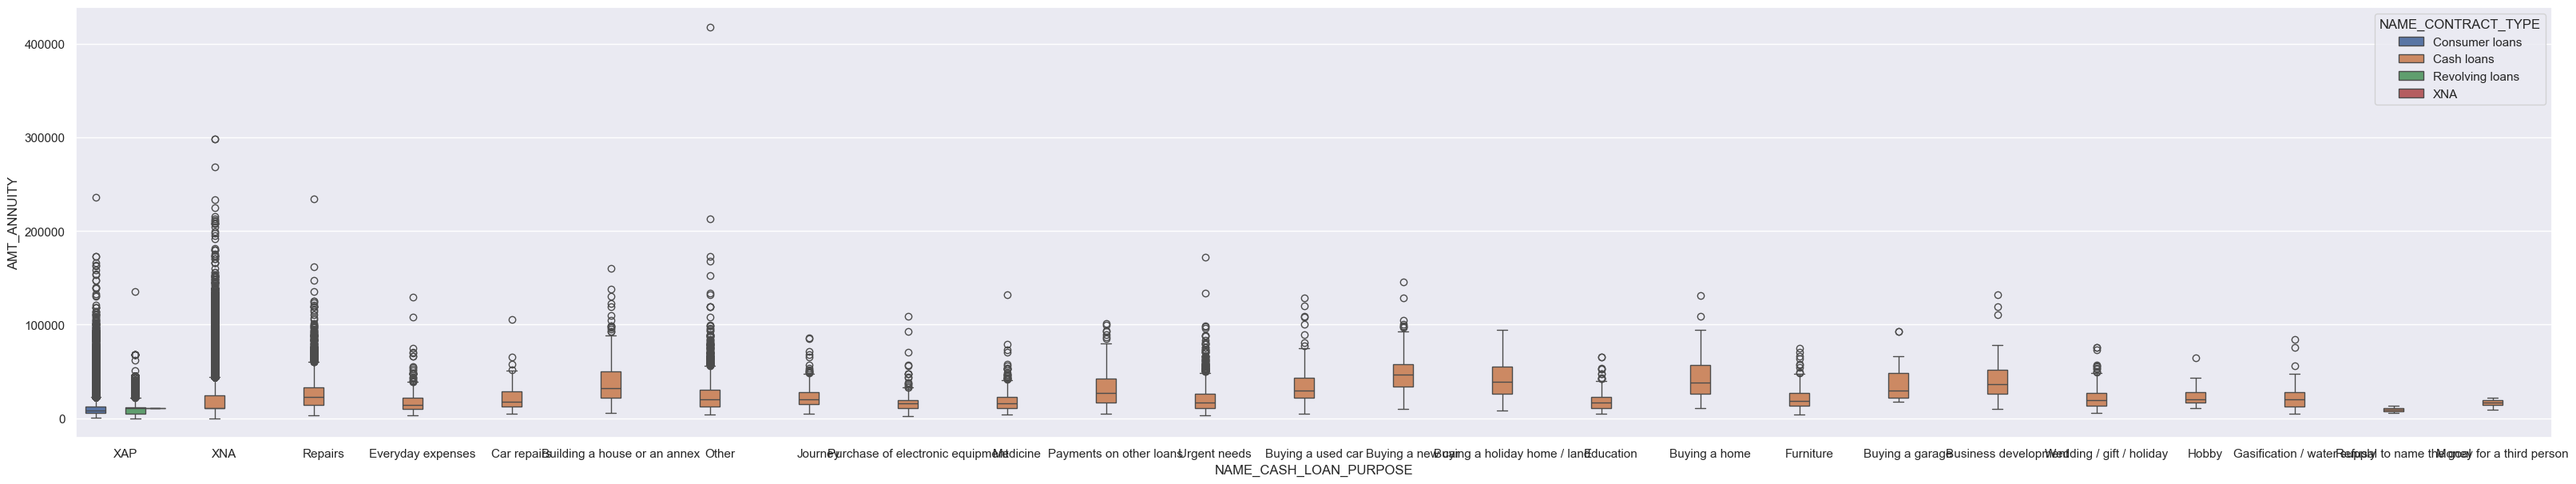

In [623]:
sns.set(rc={"figure.figsize":(40, 7)}) #width=6, height=5

sns.boxplot(data=new_df, hue=new_df["NAME_CONTRACT_TYPE"],y=new_df["AMT_ANNUITY"],x=new_df["NAME_CASH_LOAN_PURPOSE"])

In [624]:
new_df_grp = new_df.groupby("NAME_CONTRACT_TYPE").size().reset_index(name='count')
new_df_grp.apply(lambda x:x)

,NAME_CONTRACT_TYPE,count
0,Cash loans,132894
1,Consumer loans,139360
2,Revolving loans,35202
3,XNA,55


<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

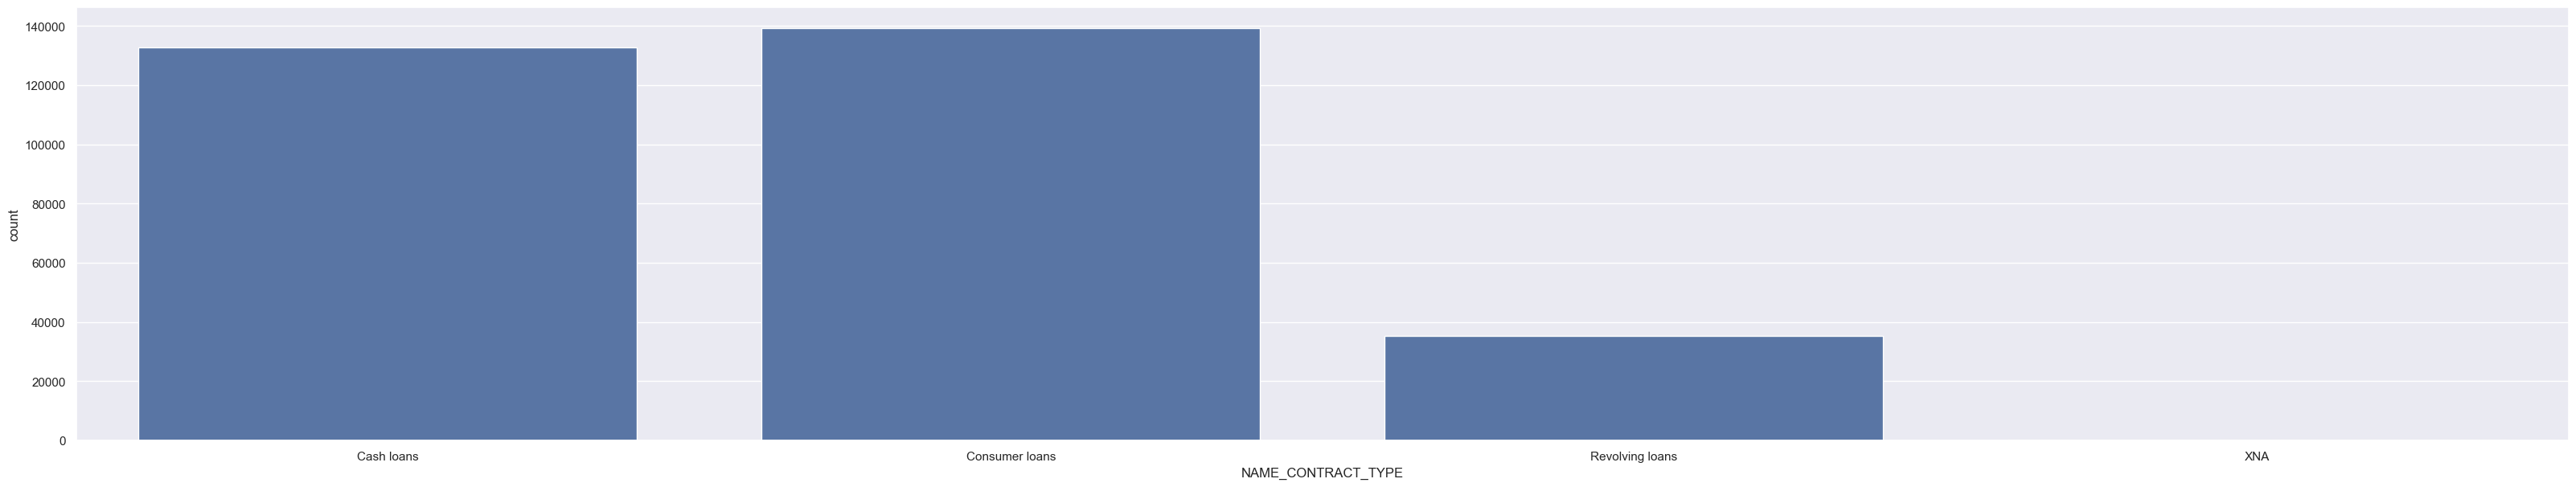

In [625]:
sns.barplot(data=new_df_grp, x="NAME_CONTRACT_TYPE", y="count")

# HERE THE CONSUMER LOAN IS THE HIGHEST NUMBER OF PEOPLE GET 139360 WHICH ALMOST EQUAL TO CASH LOAN 132894 LEAST AMOUNT OF LOAN IS XAN CATEGORICAL.

<Axes: xlabel='NAME_CASH_LOAN_PURPOSE', ylabel='AMT_ANNUITY'>

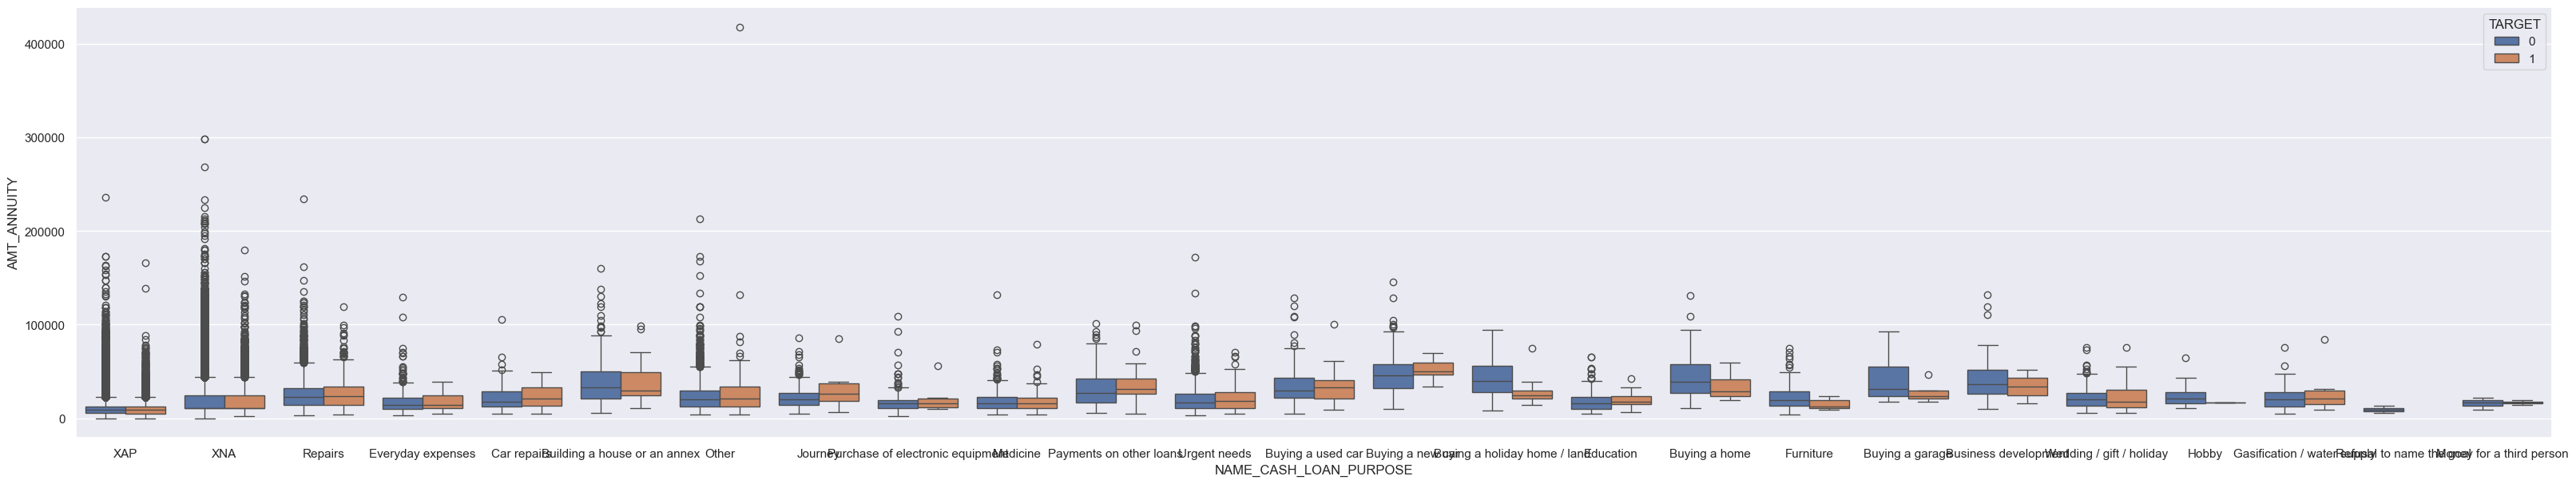

In [626]:
sns.boxplot(data=new_df, hue=new_df["TARGET"],y=new_df["AMT_ANNUITY"],x=new_df["NAME_CASH_LOAN_PURPOSE"])

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

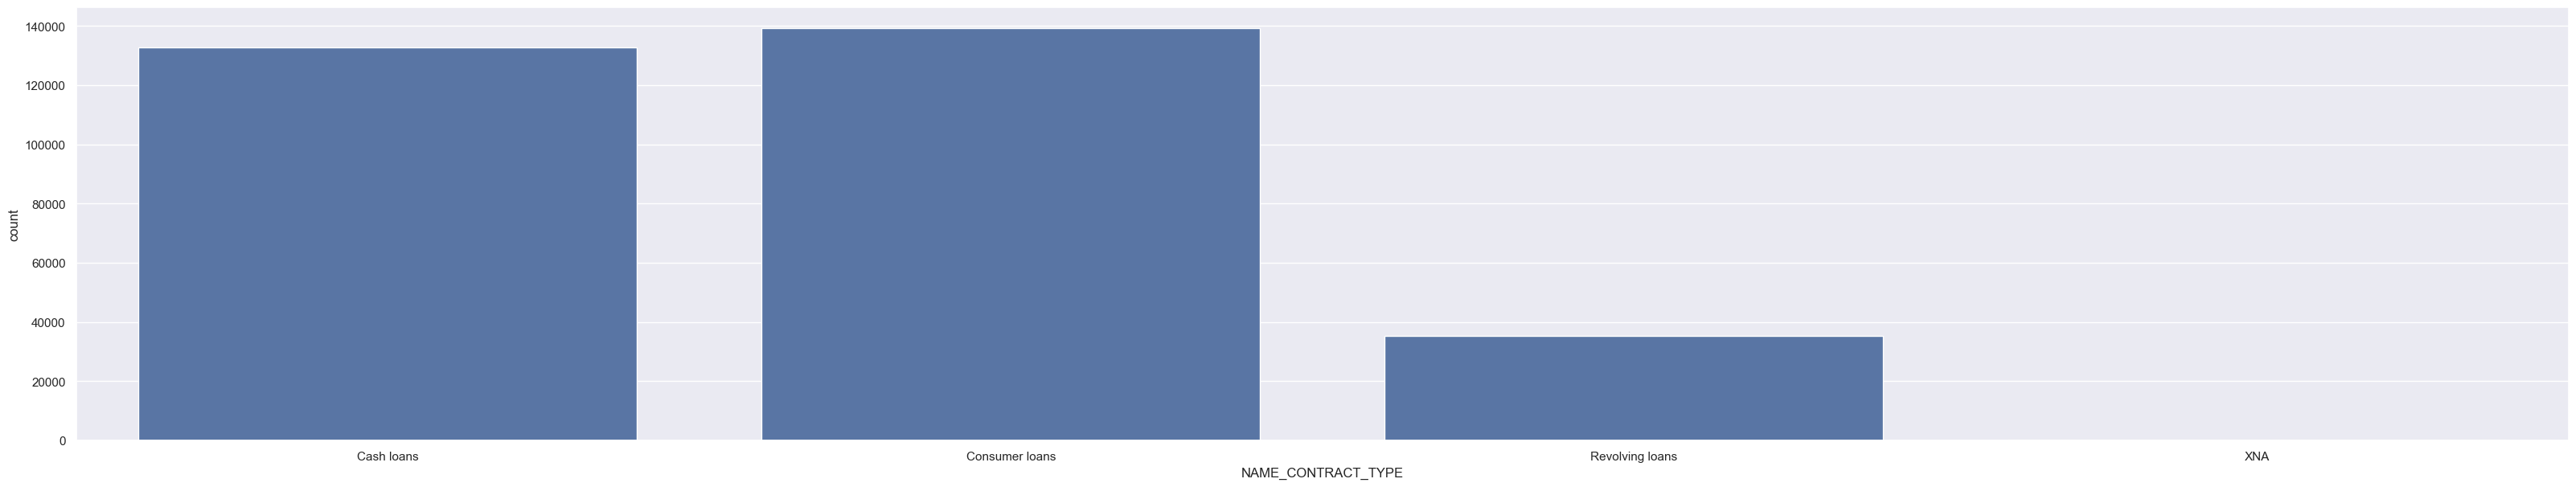

In [627]:
sns.barplot(data=new_df_grp, x="NAME_CONTRACT_TYPE", y="count")

<Axes: xlabel='AMT_ANNUITY', ylabel='Count'>

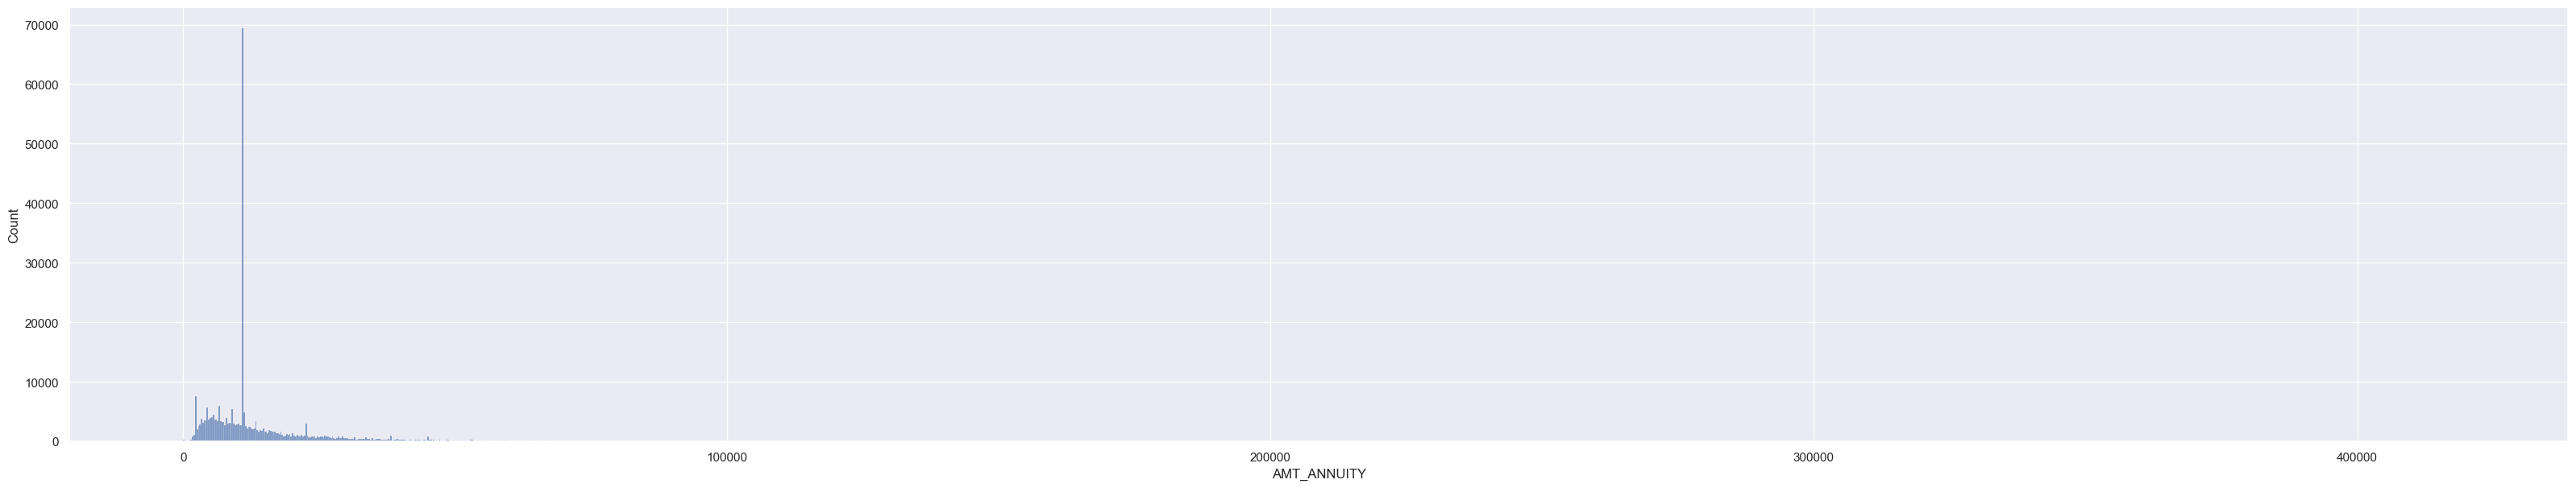

In [628]:
sns.histplot(new_df['AMT_ANNUITY']) 


<Axes: xlabel='AMT_CREDIT', ylabel='Count'>

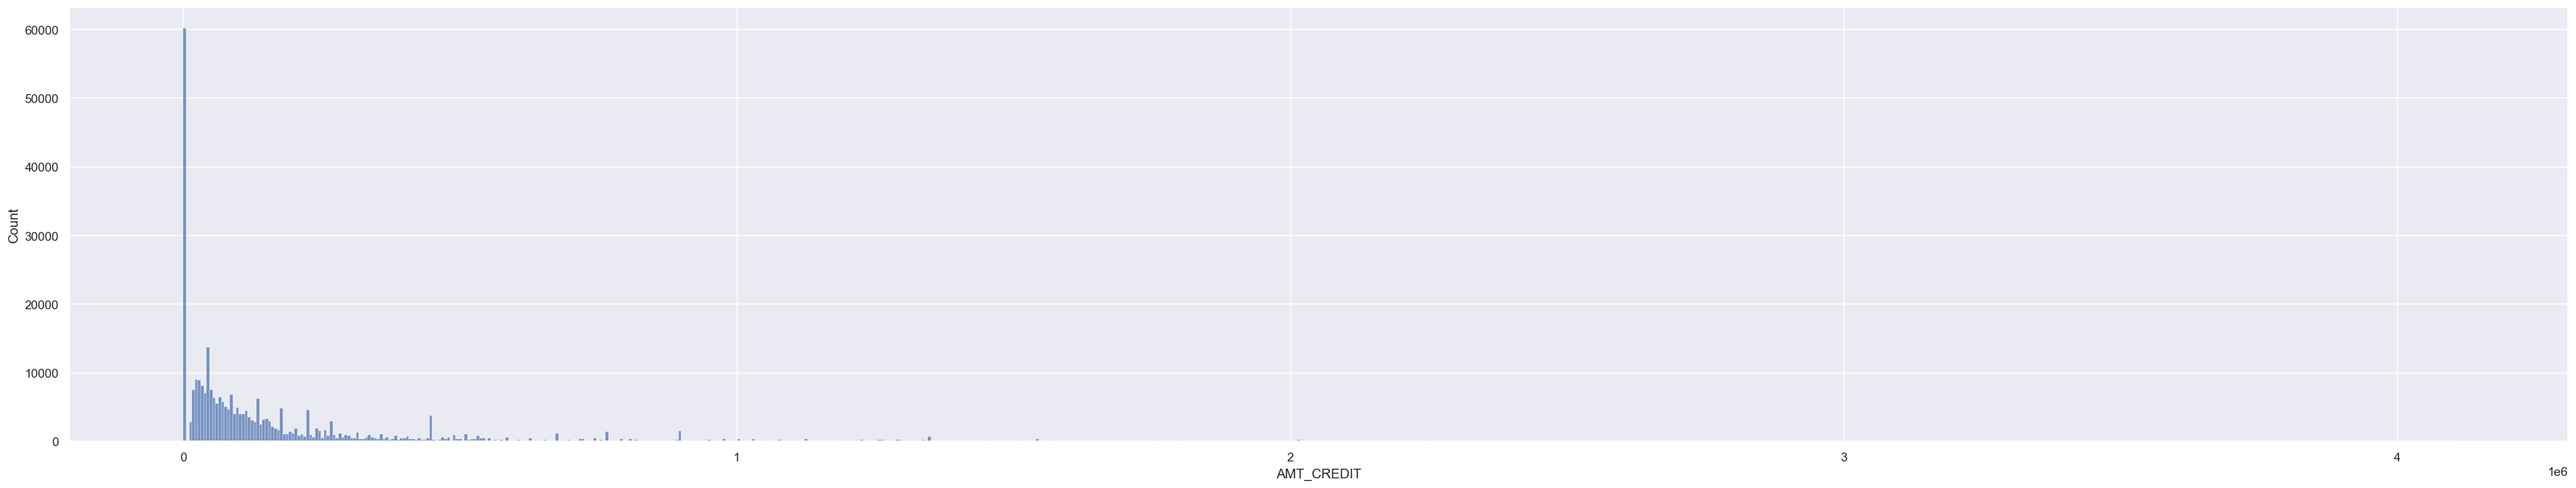

In [629]:
sns.histplot(new_df['AMT_CREDIT']) 


In [630]:
new_df["AMT_CREDIT"].max()

np.float64(4104351.0)

In [631]:
new_df["AMT_CREDIT"].min()

np.float64(0.0)

In [632]:
q1=np.percentile(new_df["AMT_CREDIT"],25)

In [633]:
q2=np.percentile(new_df["AMT_CREDIT"],50)

In [634]:
q3=np.percentile(new_df["AMT_CREDIT"],75)

In [635]:
upper_fence =  q3+1.5*(q3-q1)

In [636]:
lower_fence = q1-1.5*(q3-q1)

In [637]:
upper_fence

np.float64(472018.5)

In [638]:
lower_fence

np.float64(-243337.5)

#LOWER FENCE CAN"T BE MINUS HERE SO WE ARE TAKING AS 0.


In [639]:
lower_fence=0

In [640]:
outliers = new_df[(new_df["AMT_CREDIT"] > upper_fence) | (new_df["AMT_CREDIT"] < lower_fence)]
outliers


,NAME_CONTRACT_TYPE,AMT_ANNUITY,TARGET,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,CODE_REJECT_REASON
1,Cash loans,25188.615,0,679671.0,1710.0,607500.0,XNA,State servant,House / apartment,XAP
20,Cash loans,25454.025,0,491580.0,1710.0,450000.0,XNA,Working,House / apartment,HC
23,Cash loans,39475.305,0,1277104.5,1710.0,1129500.0,XNA,Pensioner,House / apartment,HC
47,Cash loans,75897.630,0,2241513.0,1710.0,2025000.0,XNA,Working,House / apartment,XAP
56,Cash loans,49299.435,0,504711.0,1710.0,450000.0,XNA,Pensioner,Municipal apartment,XAP
...,...,...,...,...,...,...,...,...,...,...
307482,Cash loans,32272.605,0,767664.0,1710.0,675000.0,Other,Commercial associate,House / apartment,LIMIT
307496,Cash loans,21687.750,0,536917.5,1710.0,463500.0,XNA,Working,House / apartment,LIMIT
307505,Cash loans,21521.880,0,663093.0,1710.0,553500.0,XNA,Pensioner,House / apartment,HC
307508,Cash loans,26316.945,0,491580.0,1710.0,450000.0,XNA,Working,House / apartment,XAP


In [641]:
# new_df_no_outliers = new_df[(new_df["AMT_CREDIT"] <= upper_fence) & (new_df["AMT_CREDIT"] >= lower_fence)]
# new_df_no_outliers

In [642]:
new_df.value_counts

<bound method DataFrame.value_counts of        NAME_CONTRACT_TYPE  AMT_ANNUITY  TARGET  AMT_CREDIT  AMT_DOWN_PAYMENT  \
0          Consumer loans     1730.430       1     17145.0               0.0   
1              Cash loans    25188.615       0    679671.0            1710.0   
2              Cash loans    15060.735       0    136444.5            1710.0   
3              Cash loans    47041.335       0    470790.0            1710.0   
4              Cash loans    31924.395       0    404055.0            1710.0   
...                   ...          ...     ...         ...               ...   
307506         Cash loans    11061.000       0         0.0            1710.0   
307507         Cash loans    18212.805       0    167895.0            1710.0   
307508         Cash loans    26316.945       0    491580.0            1710.0   
307509         Cash loans    11061.000       1         0.0            1710.0   
307510         Cash loans    24277.320       0    533160.0            1710.0   


In [643]:
import numpy as np

new_df_no_outliers = new_df.copy()

for column in new_df.select_dtypes(include=[np.number]).columns:
    if column != 'TARGET':  # Skip the 'TARGET' column
        q1 = np.percentile(new_df[column], 25)
        q3 = np.percentile(new_df[column], 75)

        iqr = q3 - q1

        lower_fence = q1 - 1.5 * iqr
        upper_fence = q3 + 1.5 * iqr

        new_df_no_outliers = new_df_no_outliers[
            (new_df_no_outliers[column] >= lower_fence) & 
            (new_df_no_outliers[column] <= upper_fence)
        ]

print(f"Original data shape: {new_df.shape}")
print(f"Data shape after removing outliers: {new_df_no_outliers.shape}")
new_df = new_df_no_outliers

Original data shape: (307511, 10)
Data shape after removing outliers: (118568, 10)


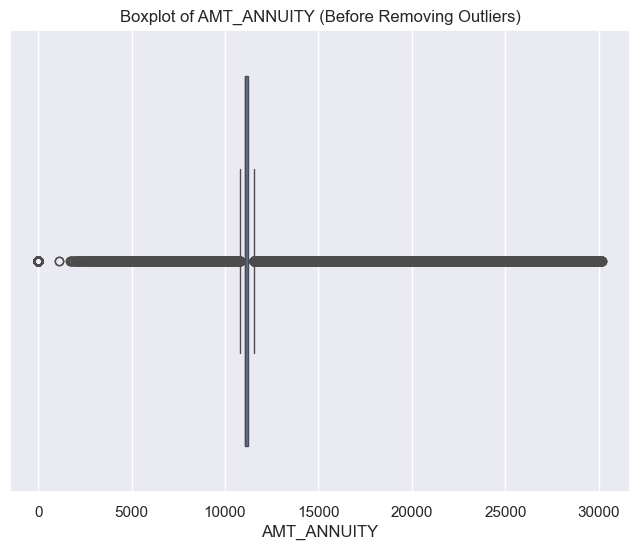

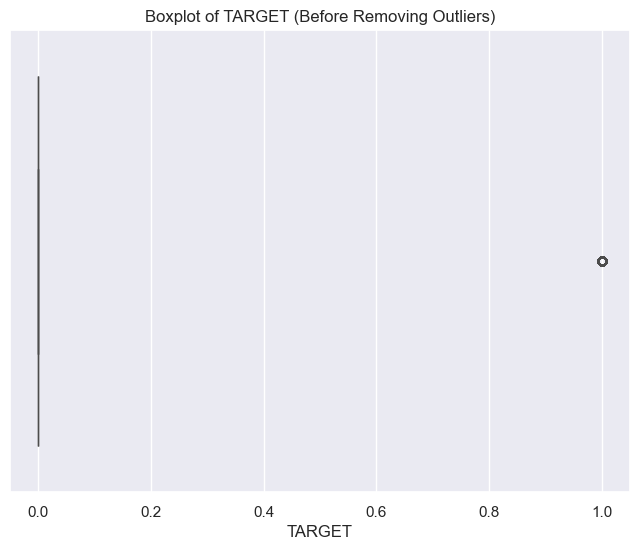

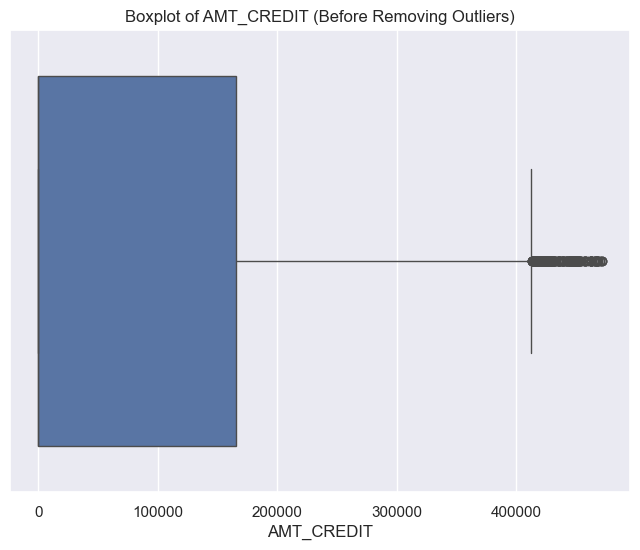

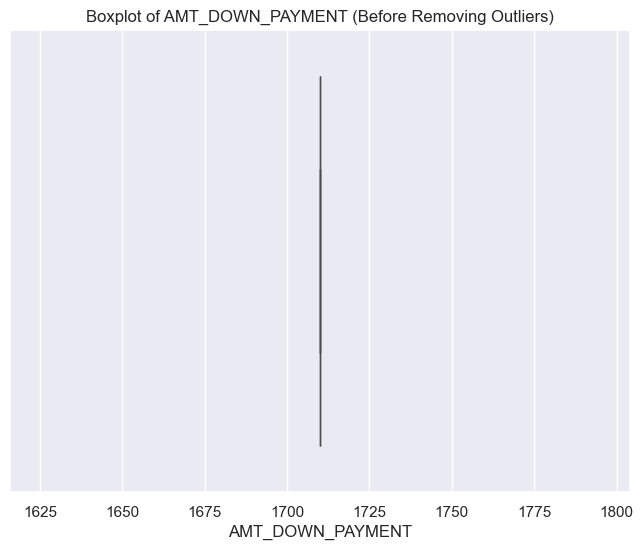

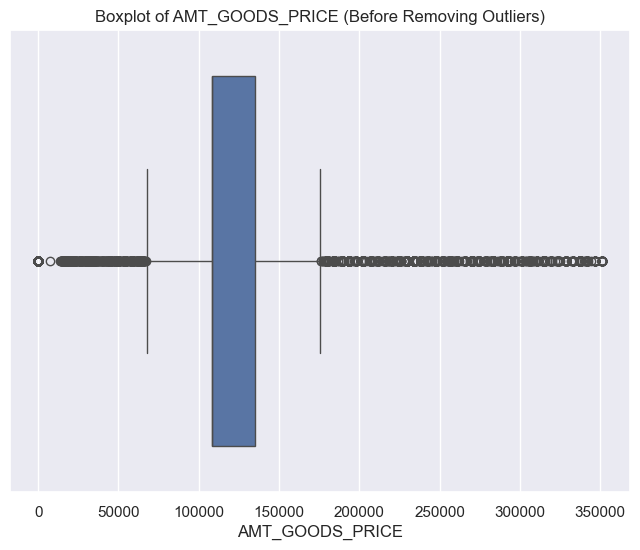

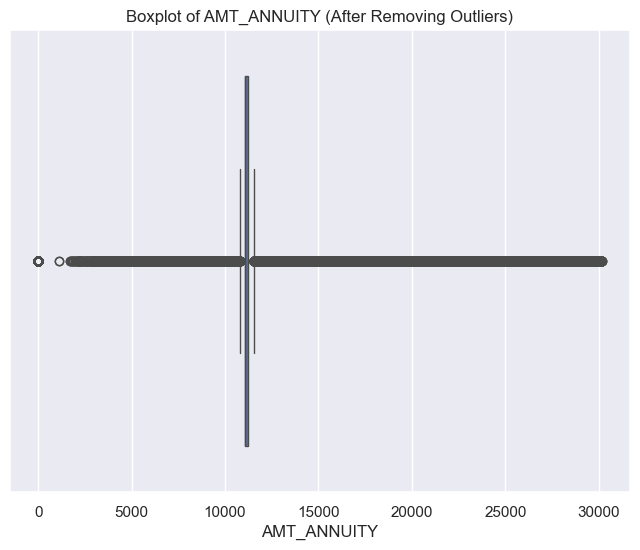

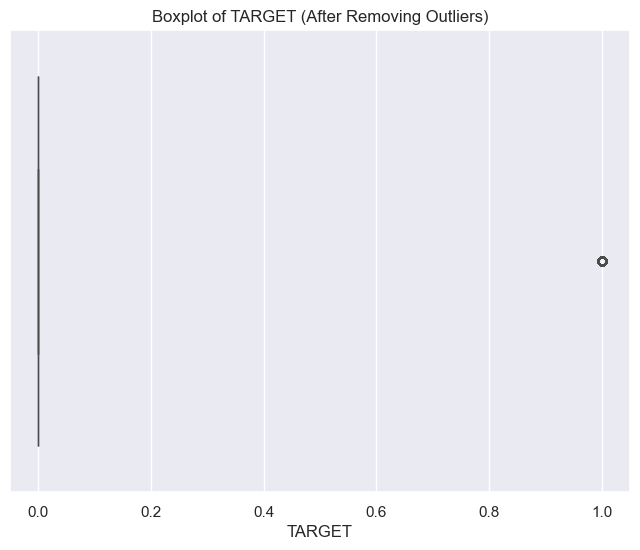

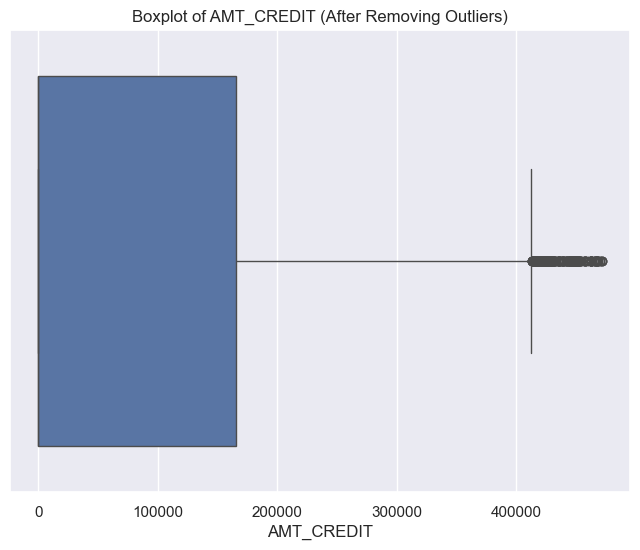

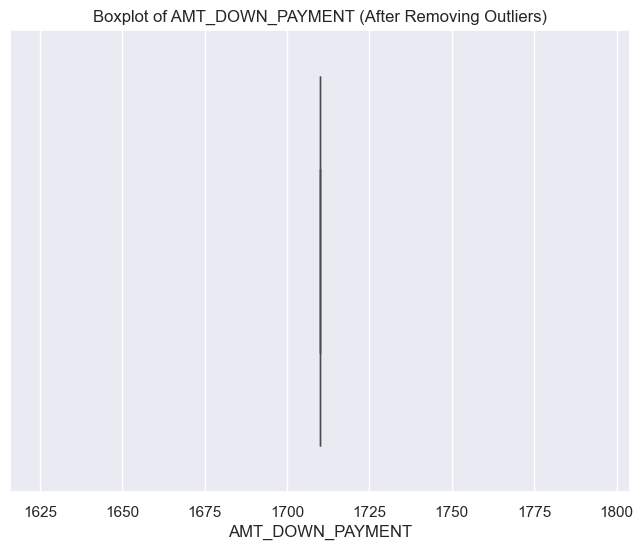

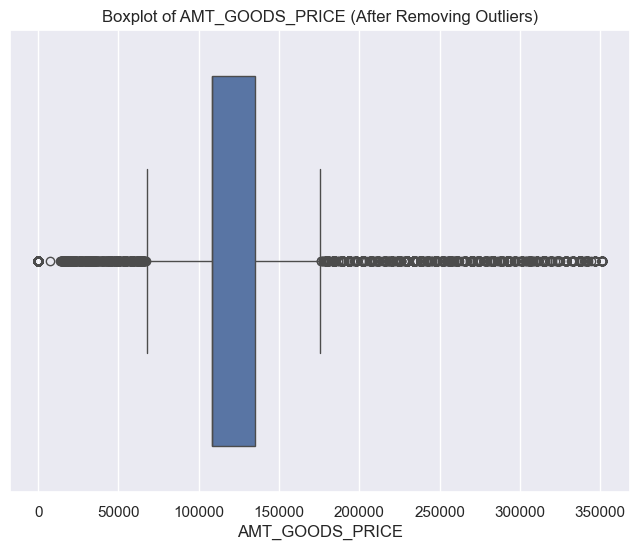

In [644]:

for column in new_df_no_outliers.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=new_df[column])
    plt.title(f"Boxplot of {column} (Before Removing Outliers)")
    plt.show()

for column in new_df_no_outliers.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=new_df_no_outliers[column])
    plt.title(f"Boxplot of {column} (After Removing Outliers)")
    plt.show()


In [645]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118568 entries, 2 to 307509
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NAME_CONTRACT_TYPE      118568 non-null  object 
 1   AMT_ANNUITY             118568 non-null  float64
 2   TARGET                  118568 non-null  int64  
 3   AMT_CREDIT              118568 non-null  float64
 4   AMT_DOWN_PAYMENT        118568 non-null  float64
 5   AMT_GOODS_PRICE         118568 non-null  float64
 6   NAME_CASH_LOAN_PURPOSE  118568 non-null  object 
 7   NAME_INCOME_TYPE        118568 non-null  object 
 8   NAME_HOUSING_TYPE       118568 non-null  object 
 9   CODE_REJECT_REASON      118568 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 10.0+ MB


In [646]:
numeric_columns = new_df.select_dtypes(include=['float64', 'int64'])


<Axes: >

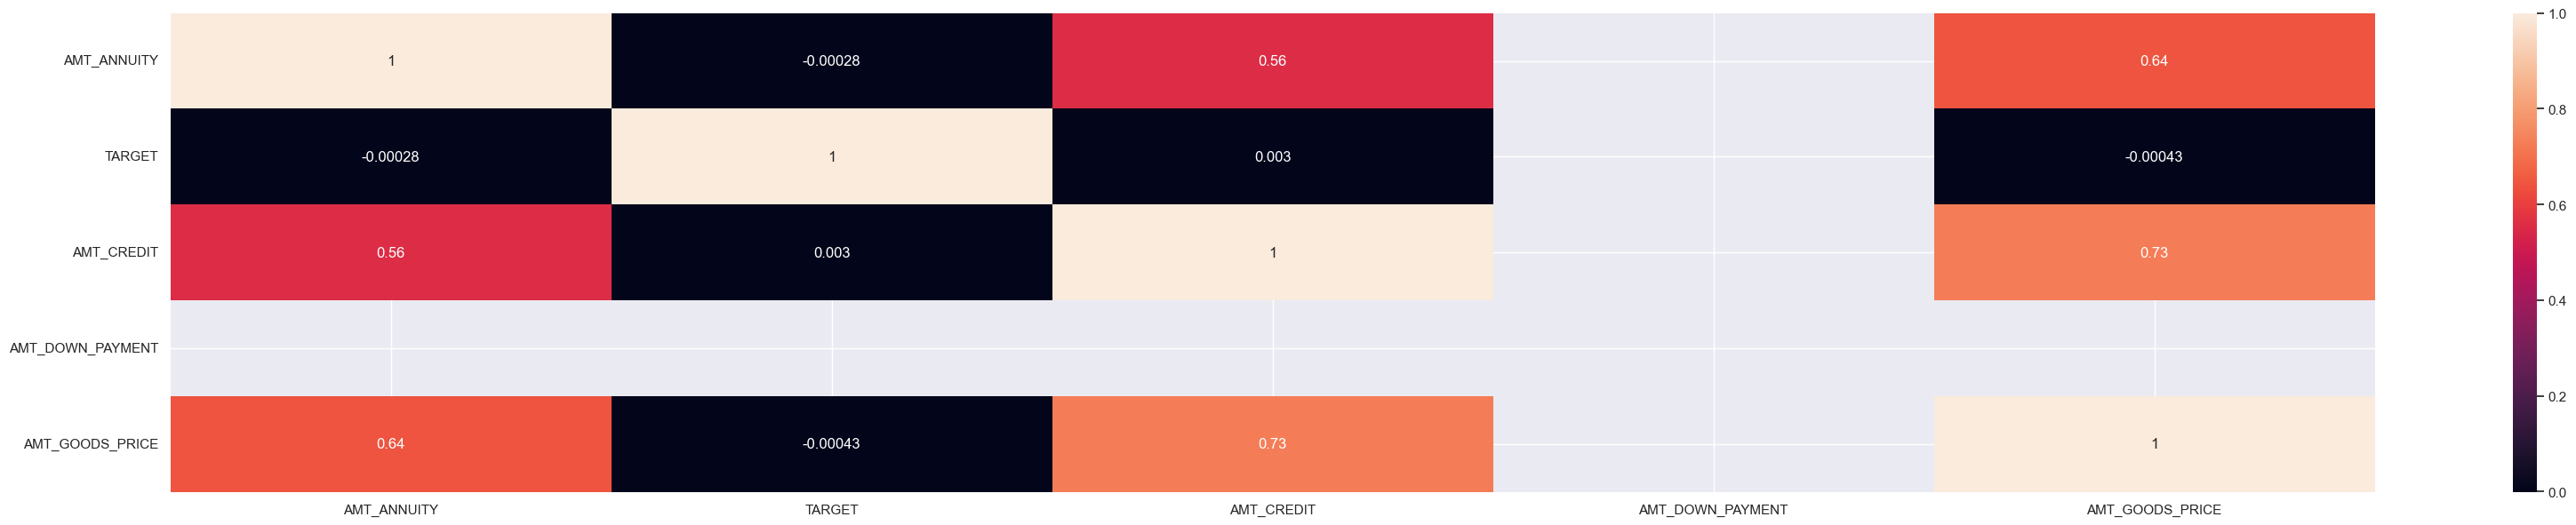

In [647]:
sns.heatmap(data=numeric_columns.corr(), annot=True)

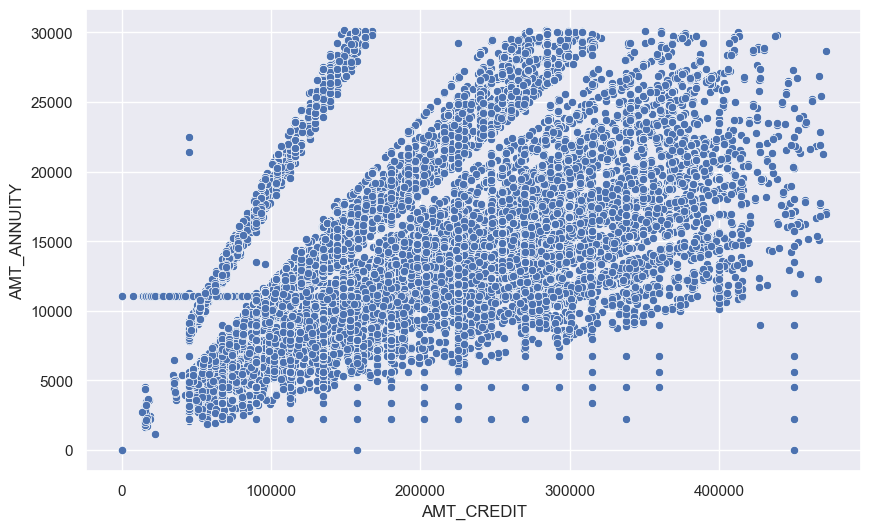

In [648]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y=new_df["AMT_ANNUITY"],x = new_df["AMT_CREDIT"])
plt.show()


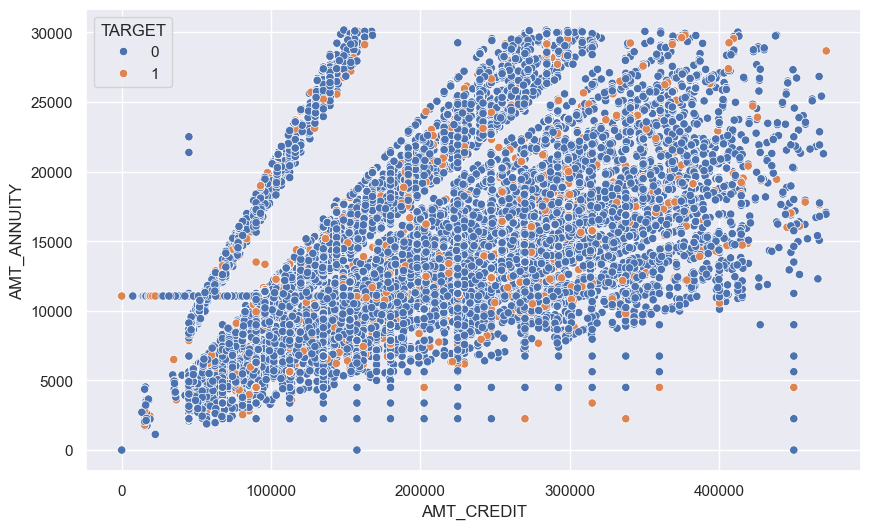

In [649]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y=new_df["AMT_ANNUITY"],x = new_df["AMT_CREDIT"],hue=new_df["TARGET"])
plt.show()


<Axes: xlabel='AMT_GOODS_PRICE', ylabel='AMT_ANNUITY'>

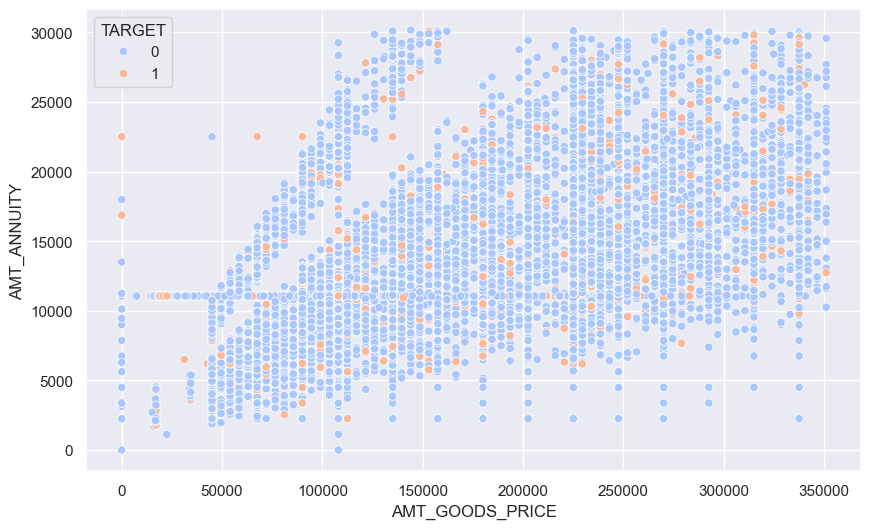

In [670]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y=new_df["AMT_ANNUITY"],x = new_df["AMT_GOODS_PRICE"],color='red',hue=new_df["TARGET"],palette="coolwarm")

In [651]:
print(new_df["AMT_CREDIT"].describe())


count    118568.000000
mean      89663.382880
std      117344.109906
min           0.000000
25%           0.000000
50%           0.000000
75%      165226.500000
max      471703.500000
Name: AMT_CREDIT, dtype: float64


In [652]:
print(new_df["AMT_DOWN_PAYMENT"].describe())


count    118568.0
mean       1710.0
std           0.0
min        1710.0
25%        1710.0
50%        1710.0
75%        1710.0
max        1710.0
Name: AMT_DOWN_PAYMENT, dtype: float64


# FROM THAT PLOT WE ARE CONCLUDE THAT INDIVUAL WITH LOWER CREDIT FIND DIFFICULTIES TO REPAY THE LOAN. THERE ARE SOME OUTLIERS ARE ALSO THERE.

In [653]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118568 entries, 2 to 307509
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NAME_CONTRACT_TYPE      118568 non-null  object 
 1   AMT_ANNUITY             118568 non-null  float64
 2   TARGET                  118568 non-null  int64  
 3   AMT_CREDIT              118568 non-null  float64
 4   AMT_DOWN_PAYMENT        118568 non-null  float64
 5   AMT_GOODS_PRICE         118568 non-null  float64
 6   NAME_CASH_LOAN_PURPOSE  118568 non-null  object 
 7   NAME_INCOME_TYPE        118568 non-null  object 
 8   NAME_HOUSING_TYPE       118568 non-null  object 
 9   CODE_REJECT_REASON      118568 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 10.0+ MB


In [654]:
# GROUPING THE DATA BASED ON NAME OF INCOME TYPE HERE WE ARE GOUPING THE THAT COLUMN TRY TO FIND HOW MUCH CREDIT BANK HAS GIVEN TO PRTICULAR INCOME PERSON

In [655]:
new_income_grp = new_df.groupby(by=["NAME_INCOME_TYPE"],as_index=False).agg({"AMT_CREDIT":"sum"})
new_income_grp["AMT_CREDIT_MILL"] = new_income_grp["AMT_CREDIT"]/100000
new_income_grp

,NAME_INCOME_TYPE,AMT_CREDIT,AMT_CREDIT_MILL
0,Businessman,4.500000e+05,4.500000
1,Commercial associate,2.466063e+09,24660.634609
2,Maternity leave,1.845000e+05,1.845000
3,Pensioner,1.904663e+09,19046.631709
4,State servant,7.671513e+08,7671.513381
5,Student,1.095336e+06,10.953360
6,Unemployed,6.505470e+05,6.505470
7,Working,5.490950e+09,54909.496284


<Axes: xlabel='NAME_INCOME_TYPE', ylabel='AMT_CREDIT_MILL'>

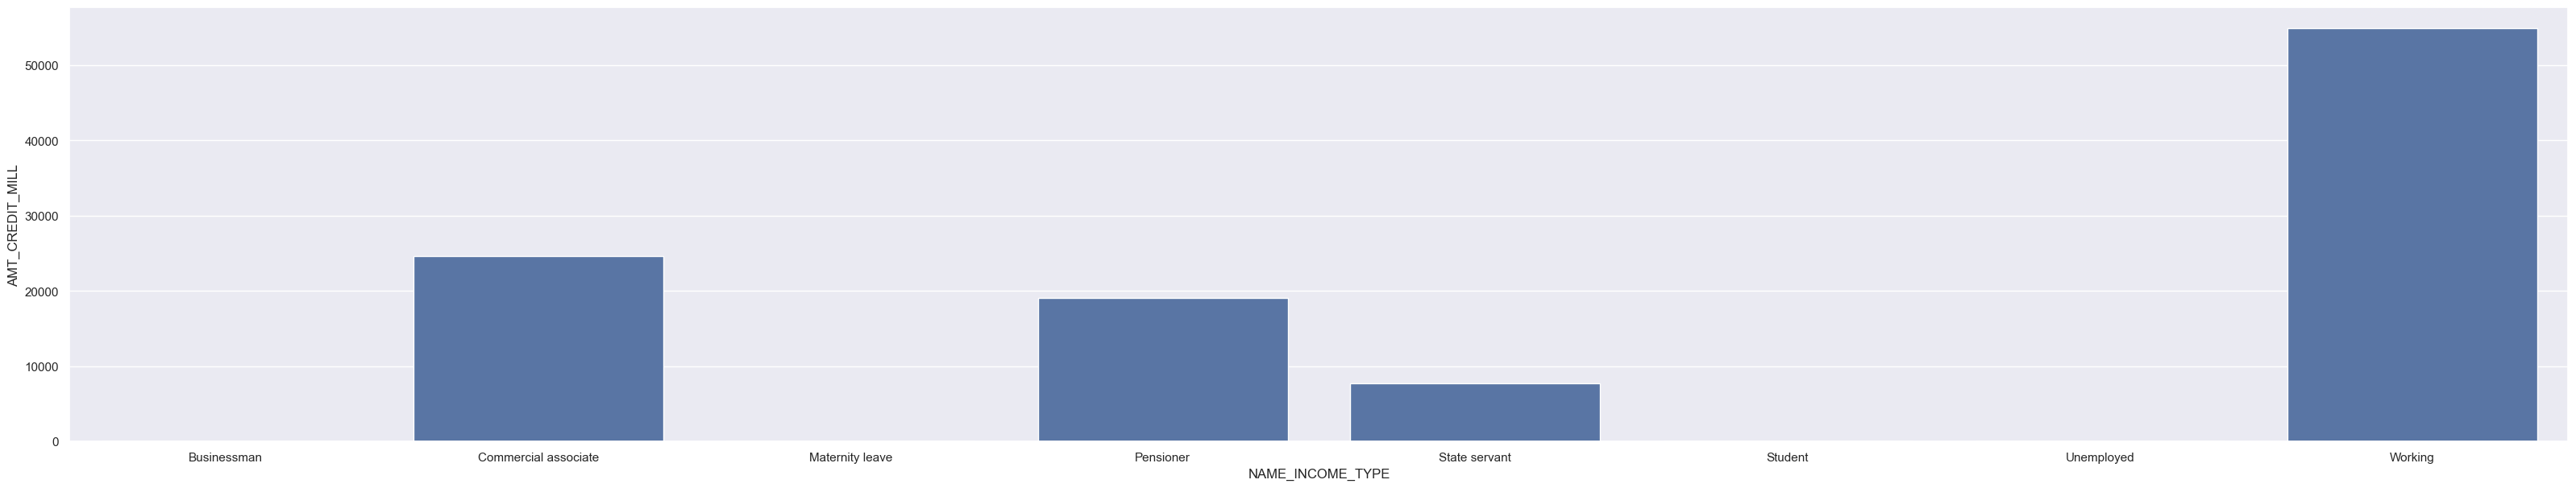

In [656]:
sns.barplot(x=new_income_grp["NAME_INCOME_TYPE"], y=new_income_grp["AMT_CREDIT_MILL"])

# HERE AS WE CAN SEE THAT BANK IS GIVING THE MAXIMUM ABOUT MONEY TO WORKING PROFESSION WHICH THEY CAN EASILY REPAY THE LOAN SEOND HIGHEST MONEY IS GIVEN TO COMMERCIAL AND PENSIONER. ONE INTERESTING THINGS HERE THAT MUCH LESS AMOUNT OF MONEY GIVEN TO THE UMEMPLOYED ,STUDENT AND BUSINEESMAN

In [657]:
new_income_grp_re = new_df.groupby(by=["NAME_INCOME_TYPE"],as_index=False).agg({"AMT_DOWN_PAYMENT":"sum"})
new_income_grp_re["AMT_DOWN_PAYMENT_MILL"] = new_income_grp_re["AMT_DOWN_PAYMENT"]/100000
new_income_grp_re

,NAME_INCOME_TYPE,AMT_DOWN_PAYMENT,AMT_DOWN_PAYMENT_MILL
0,Businessman,5130.0,0.0513
1,Commercial associate,47211390.0,472.1139
2,Maternity leave,1710.0,0.0171
3,Pensioner,36665820.0,366.6582
4,State servant,14475150.0,144.7515
5,Student,11970.0,0.1197
6,Unemployed,15390.0,0.1539
7,Working,104364720.0,1043.6472


<Axes: xlabel='NAME_INCOME_TYPE', ylabel='AMT_DOWN_PAYMENT_MILL'>

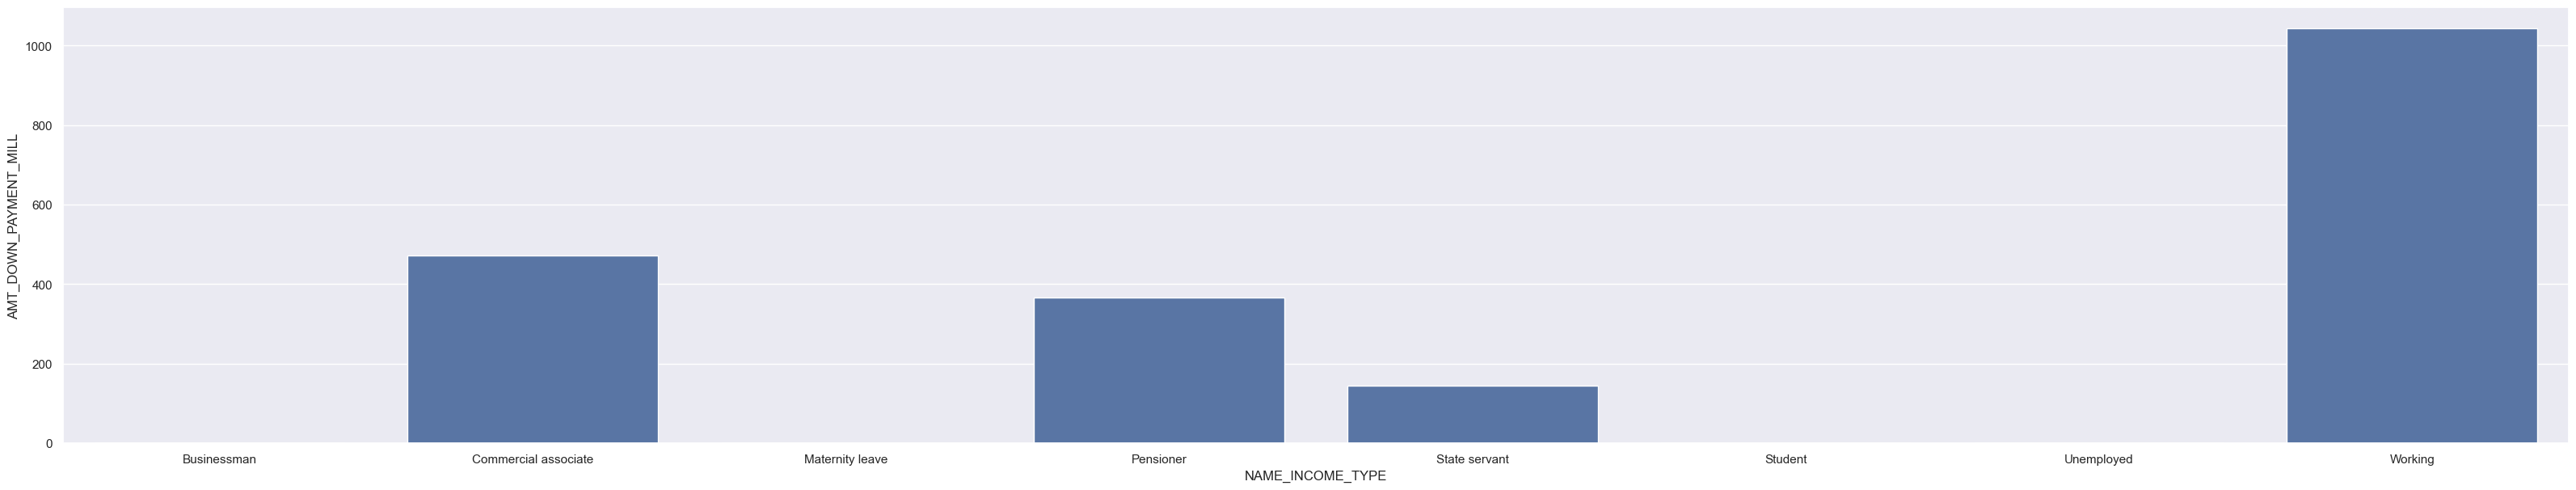

In [658]:
sns.barplot(x=new_income_grp_re["NAME_INCOME_TYPE"], y=new_income_grp_re["AMT_DOWN_PAYMENT_MILL"])

# HIGHER AMOUNT OF CREDIT WHO TAKE THAT LOAN WHICH ALSO REPAY THE LOAN HIGHEST AMOUNT 

In [659]:
# Calculating the proportion of down payment to credit for each income type
proportion_df = new_income_grp_re["AMT_DOWN_PAYMENT"] / new_income_grp["AMT_CREDIT"]

proportion_df

0    0.011400
1    0.019144
2    0.009268
3    0.019251
4    0.018869
5    0.010928
6    0.023657
7    0.019007
dtype: float64

**BUSINESS OBJECTIVE GROUPING THE TARGET AND PROFESSIONAL COLUMN  SHOULD WE GIVE LOAN AGAIN OR NOT.

In [660]:
new_grp_target = new_df.groupby(by=["TARGET","NAME_INCOME_TYPE","NAME_CONTRACT_TYPE"],as_index=False).agg({'AMT_CREDIT':'sum','AMT_DOWN_PAYMENT':'sum'})
new_grp_target.apply(lambda x:x)

,TARGET,NAME_INCOME_TYPE,NAME_CONTRACT_TYPE,AMT_CREDIT,AMT_DOWN_PAYMENT
0,0,Businessman,Cash loans,0.000000e+00,3420.0
1,0,Businessman,Revolving loans,4.500000e+05,1710.0
2,0,Commercial associate,Cash loans,1.492498e+09,31833360.0
3,0,Commercial associate,Consumer loans,1.238007e+07,326610.0
4,0,Commercial associate,Revolving loans,7.693425e+08,11385180.0
5,0,Commercial associate,XNA,0.000000e+00,22230.0
6,0,Maternity leave,Cash loans,1.845000e+05,1710.0
7,0,Pensioner,Cash loans,1.194415e+09,25323390.0
8,0,Pensioner,Consumer loans,1.253336e+07,292410.0
9,0,Pensioner,Revolving loans,5.986125e+08,9033930.0


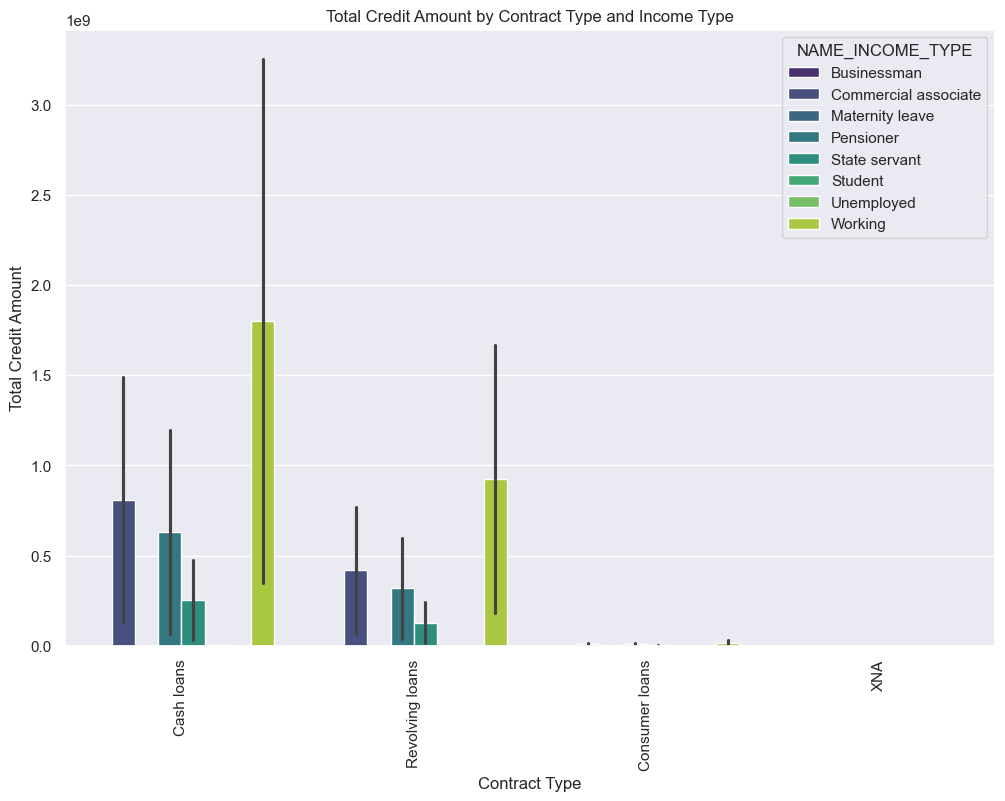

In [661]:
plt.figure(figsize=(12, 8))  # Set figure size to ensure labels are visible
sns.barplot(x="NAME_CONTRACT_TYPE", y="AMT_CREDIT", data=new_grp_target, palette="viridis", hue="NAME_INCOME_TYPE")
plt.xticks(rotation=90)
plt.xlabel("Contract Type")
plt.ylabel("Total Credit Amount")
plt.title("Total Credit Amount by Contract Type and Income Type")
plt.show()


You might also observe outliers or unusual patterns in the data. For example, if certain contract types for specific income groups show extremely high credit amounts (like in the Working or Commercial associate categories), this could indicate outliers or business-specific needs requiring large loan amounts.

In [662]:
new_df_grp = new_df.groupby(by=["NAME_CASH_LOAN_PURPOSE","TARGET"]).size().reset_index(name="count")
new_df_grp.apply(lambda x:x)

,NAME_CASH_LOAN_PURPOSE,TARGET,count
0,Building a house or an annex,0,94
1,Building a house or an annex,1,7
2,Business development,0,12
3,Business development,1,1
4,Buying a garage,0,4
5,Buying a garage,1,1
6,Buying a holiday home / land,0,17
7,Buying a home,0,10
8,Buying a home,1,4
9,Buying a new car,0,16


Text(0.5, 1.0, 'Count of Different Cash Loan Purposes')

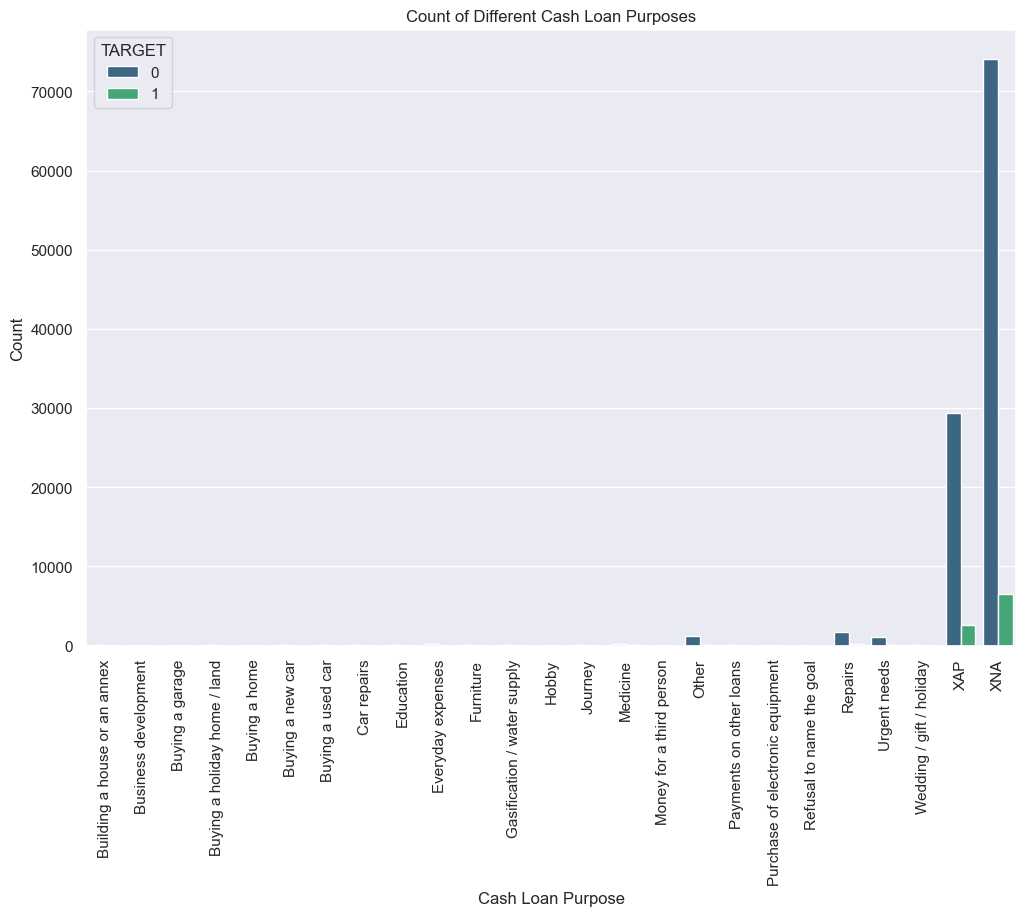

In [663]:
plt.figure(figsize=(12, 8))  # Set figure size to ensure labels are visible
sns.barplot(x="NAME_CASH_LOAN_PURPOSE", y="count", data=new_df_grp, palette="viridis",hue="TARGET")
plt.xticks(rotation=90)
plt.xlabel("Cash Loan Purpose")
plt.ylabel("Count")
plt.title("Count of Different Cash Loan Purposes")

In [664]:
new_df["TARGET"].value_counts()

TARGET
0    108939
1      9629
Name: count, dtype: int64

FROM THAT WE CONCLUDE THAT ONLY TWO CATEGORICAL PEOPLE DOESN"T REPAY THE LOAN IT IS XAP AND XNA. NEXT TIME BANK SHOULD NOT GIVE THE LOAN HERE.

In [665]:
new_df.shape

(118568, 10)

In [679]:
new_df.head()

,NAME_CONTRACT_TYPE,AMT_ANNUITY,TARGET,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,CODE_REJECT_REASON
2,Cash loans,15060.735,0,136444.5,1710.0,112500.0,XNA,Working,House / apartment,XAP
5,Cash loans,23703.930,0,340573.5,1710.0,315000.0,Everyday expenses,State servant,House / apartment,XAP
6,Cash loans,11061.000,0,0.0,1710.0,107955.0,XNA,Commercial associate,House / apartment,XAP
7,Cash loans,11061.000,0,0.0,1710.0,107955.0,XNA,State servant,House / apartment,XAP
8,Cash loans,11061.000,0,0.0,1710.0,107955.0,XNA,Pensioner,House / apartment,XAP


In [666]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118568 entries, 2 to 307509
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NAME_CONTRACT_TYPE      118568 non-null  object 
 1   AMT_ANNUITY             118568 non-null  float64
 2   TARGET                  118568 non-null  int64  
 3   AMT_CREDIT              118568 non-null  float64
 4   AMT_DOWN_PAYMENT        118568 non-null  float64
 5   AMT_GOODS_PRICE         118568 non-null  float64
 6   NAME_CASH_LOAN_PURPOSE  118568 non-null  object 
 7   NAME_INCOME_TYPE        118568 non-null  object 
 8   NAME_HOUSING_TYPE       118568 non-null  object 
 9   CODE_REJECT_REASON      118568 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 10.0+ MB


# HERE WE ARE FINDING THE NULL HYPOTHESIS FOR "AMT_CREDIT" AND "AMT_ANNUITY" IS THERE ARE SIGNIFICANT CORRELATION BETWEEN THEM OR NOT.

# Null Hypothesis: There is no correlation (H₀: ρ = 0)
# Alternative Hypothesis: There is a correlation (H₁: ρ ≠ 0)

In [669]:
corr, p_value = stats.pearsonr(new_df['AMT_CREDIT'], new_df['AMT_ANNUITY'])
print(f"Correlation coefficient: {corr}, p-value: {p_value}")


if p_value < 0.05:
    print("Reject null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject null hypothesis: No significant correlation.")

# Simple Linear Regression
X = new_df['AMT_CREDIT']
y = new_df['AMT_ANNUITY']
X = sm.add_constant(X) 




Correlation coefficient: 0.5582086128957918, p-value: 0.0
Reject null hypothesis: There is a significant correlation.


Another null hypothesis between AMT_ANNUITY and AMT_GOODS_PRICE

In [671]:
corr, p_value = stats.pearsonr(new_df['AMT_ANNUITY'], new_df['AMT_GOODS_PRICE'])
print(f"Correlation coefficient: {corr}, p-value: {p_value}")


if p_value < 0.05:
    print("Reject null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject null hypothesis: No significant correlation.")

# Simple Linear Regression
X = new_df['AMT_ANNUITY']
y = new_df['AMT_GOODS_PRICE']
X = sm.add_constant(X) 


Correlation coefficient: 0.6433532716217116, p-value: 0.0
Reject null hypothesis: There is a significant correlation.


# ONE WAY ANNOVA TEST  AMT_ANNUITY,AMT_GOODS_PRICE,AMT_CREDIT

In [673]:
grouped_annuity = [new_df[new_df['TARGET'] == 0]['AMT_ANNUITY'], new_df[new_df['TARGET'] == 1]['AMT_ANNUITY']]
grouped_goods_price = [new_df[new_df['TARGET'] == 0]['AMT_GOODS_PRICE'], new_df[new_df['TARGET'] == 1]['AMT_GOODS_PRICE']]
grouped_credit = [new_df[new_df['TARGET'] == 0]['AMT_CREDIT'], new_df[new_df['TARGET'] == 1]['AMT_CREDIT']]

f_stat_annuity, p_value_annuity = stats.f_oneway(*grouped_annuity)
print(f"AMT_ANNUITY - F-statistic: {f_stat_annuity}, P-value: {p_value_annuity}")

f_stat_goods_price, p_value_goods_price = stats.f_oneway(*grouped_goods_price)
print(f"AMT_GOODS_PRICE - F-statistic: {f_stat_goods_price}, P-value: {p_value_goods_price}")

f_stat_credit, p_value_credit = stats.f_oneway(*grouped_credit)
print(f"AMT_CREDIT - F-statistic: {f_stat_credit}, P-value: {p_value_credit}")


AMT_ANNUITY - F-statistic: 0.009221729833700404, P-value: 0.923497036872894
AMT_GOODS_PRICE - F-statistic: 0.02153736656180009, P-value: 0.8833247492768501
AMT_CREDIT - F-statistic: 1.0362187522217565, P-value: 0.30870460080464496


The analysis reveals that the loan repayment status (target variable) does not significantly affect the variables AMT_ANNUITY, AMT_GOODS_PRICE, or AMT_CREDIT. Therefore, based on this data, there is no evidence to suggest that these variables are significant predictors or differentiators for whether a loan is repaid or not.

In [675]:
# Create the new formula without the interaction term
formula_without_interaction = 'AMT_ANNUITY ~ C(NAME_CASH_LOAN_PURPOSE) + C(NAME_INCOME_TYPE)'

# Fit the model
model_without_interaction = ols(formula_without_interaction, data=new_df).fit()

# Perform the ANOVA
anova_table_without_interaction = sm.stats.anova_lm(model_without_interaction, typ=2)
print(anova_table_without_interaction)


                                 sum_sq        df           F    PR(>F)
C(NAME_CASH_LOAN_PURPOSE)  4.078091e+11      24.0  795.907987  0.000000
C(NAME_INCOME_TYPE)        1.413594e+08       7.0    0.945897  0.469352
Residual                   2.530656e+12  118536.0         NaN       NaN


Conclusion Based on the ANOVA Results:
NAME_CASH_LOAN_PURPOSE has a significant effect on the dependent variable (AMT_ANNUITY), meaning different loan purposes (e.g., personal loan, home loan) have statistically significant different average AMT_ANNUITY values.
NAME_INCOME_TYPE does not have a significant effect on AMT_ANNUITY. This suggests that income type (e.g., salaried, self-employed, etc.) does not significantly impact the AMT_ANNUITY value.

In [676]:
contingency_table = pd.crosstab(new_df['NAME_CASH_LOAN_PURPOSE'], new_df['NAME_INCOME_TYPE'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square statistic: {chi2}, p-value: {p}")

Chi-Square statistic: 102.9743270097373, p-value: 0.9999802590825855


The Chi-Square Test indicates that the relationship between loan purpose and income type is not significant. These two variables do not appear to be related, and thus, you can treat them as independent in your analysis.

In [680]:

contingency_table = pd.crosstab(new_df['NAME_CONTRACT_TYPE'], new_df['CODE_REJECT_REASON'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square statistic: {chi2}, p-value: {p}")

Chi-Square statistic: 39185.72932807691, p-value: 0.0


The p-value is extremely small (essentially 0), which is much smaller than the common significance level (0.05). This means that we reject the null hypothesis and conclude that there is a significant association between the two categorical variables: NAME_CONTRACT_TYPE (the type of contract) and CODE_REJECT_REASON (the reason for loan rejection).

In [682]:

contingency_table = pd.crosstab(new_df['NAME_HOUSING_TYPE'], new_df['NAME_CONTRACT_TYPE'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square statistic: {chi2}, p-value: {p}")

Chi-Square statistic: 14.08520805352707, p-value: 0.5190768124328902


Since the p-value is much greater than 0.05, we fail to reject the null hypothesis. This means there is no significant association between the two categorical variables: NAME_HOUSING_TYPE (housing type) and NAME_CONTRACT_TYPE (contract type). Therefore, the type of housing does not appear to have any significant relationship with the type of loan contract.

# This analysis shows that, while the loan contract type is significantly associated with the reason for loan rejection, the housing type does not appear to play a significant role in determining the type of loan contract. These findings provide valuable insights for stakeholders, such as loan issuers or financial analysts, in understanding what factors influence loan rejection decisions, helping to improve decision-making processes and strategies for loan approval.

# With this conclusion, the statistical hypothesis testing portion of the project is complete, and the results point to the importance of contract type in relation to loan rejection reasons, while highlighting the irrelevance of housing type in determining loan contracts.